In [2]:
import numpy as np

In [3]:
def hypothesis(x, theta0, theta1):
    y = theta0 + theta1 * x
    return y

In [4]:
def cost(x, y, theta0, theta1):
    return (1/len(x) * 0.5) * np.sum(np.square(hypothesis(x, theta0, theta1) - y))

In [5]:
def gradient(theta0, theta1, learning_rate, x, y, iter):
    t0 = theta0
    t1 = theta1
    history = []
    costs = []
    for i in range(iter):
        prediction = hypothesis(x, t0, t1)
        temp0 = t0 - learning_rate / len(x) * np.sum(prediction - y)
        temp1 = t1 - learning_rate / len(x) * np.sum(np.multiply((prediction - y), x))
        t0 = temp0
        t1 = temp1
        history.append([t0, t1])
        costs.append(cost(x, y, t0, t1))
    return history, costs


In [6]:
np.random.seed(42)
x = 2 * np.random.rand(100,1)
np.random.seed(41)
y = 4 + 3 * x + np.random.randn(100,1)
theta0 = 0
theta1= 0

history, costs = gradient(theta0, theta1, 0.05, x, y, 100)
theta0 = history[-1][0]
theta1 = history[-1][1]

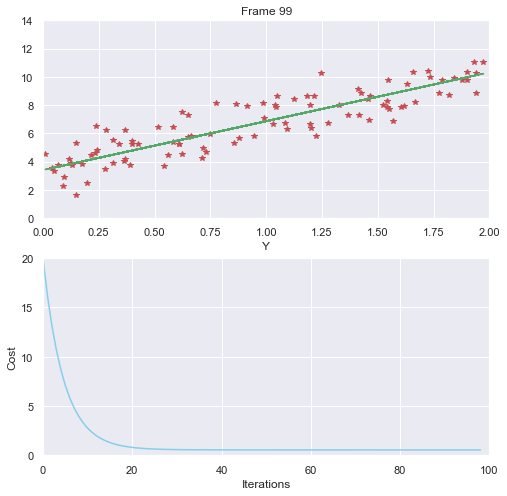

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, Image
import seaborn as sns
sns.set()


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
line1, = ax1.plot([], [], color = "r", marker='*', linestyle='None')
line2, = ax1.plot([], [], color = "g")
line3, = ax2.plot([], [], color='skyblue')

val = len(history)

def update(num):
    predict = hypothesis(x, history[num][0], history[num][1])
    ax1.set_title(f"Frame {num}")
    line1.set_data(x, y)
    line2.set_data(x, predict)
    line3.set_data(range(val)[:num], costs[:num])
    return [line1,line2, line3]
ax1.set_xlim(0,2)
ax1.set_xlabel("X")
ax1.set_xlabel("Y")
ax1.set_ylim(0,14)
ax2.set_xlim(0,val)
ax2.set_ylim(0,np.max(costs))
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Cost")


ani = animation.FuncAnimation(fig, update, len(x),
                  interval=val, blit=True)

ani.save('animation.gif', writer='imagemagick', fps=60, dpi=256)
Image(url='animation.gif')
